# 개발환경 설정

### gpu 할당

In [ ]:
!nvidia-smi

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# TensorFlow and tf.keras

import tensorflow as tf
import tensorflow.keras

import pandas as pd
import seaborn as sns

from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.display import Image

from tensorflow.keras.datasets import cifar10

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

import itertools



In [ ]:
cifar10 = tf.keras.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


170508288/170498071 [==============================] - 4s 0us/step


In [ ]:
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [ ]:
print(train_images.shape, ': train set dim')
print(test_images.shape, ': test set dim')

(50000, 32, 32, 3) : train set dim
(10000, 32, 32, 3) : test set dim


32 X 32 픽셀의 컬러 이미지이다.

In [ ]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [ ]:
train_labels = np.ravel(train_labels)
test_labels = np.ravel(test_labels)

In [ ]:
train_labels

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

라벨링이 2차원 배열로 되어있어서, 1차원 배열로 변환 해 준다
https://stackoverflow.com/questions/46902367/numpy-array-typeerror-only-integer-scalar-arrays-can-be-converted-to-a-scalar-i

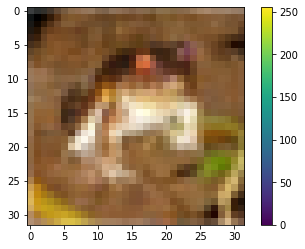

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

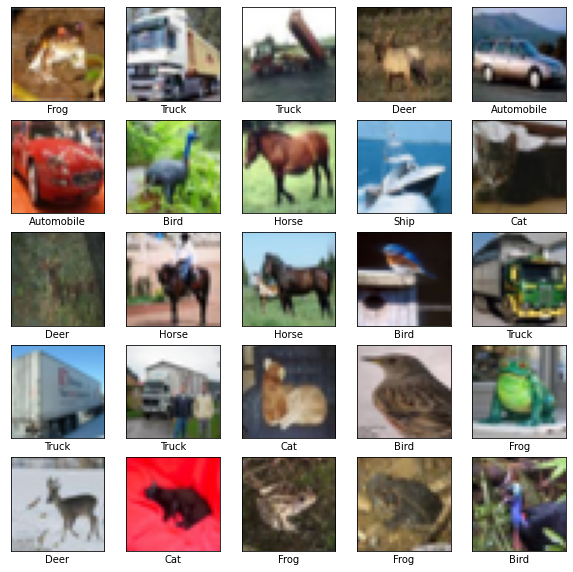

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:

model = Sequential()

model.add(Conv2D(32,
                 kernel_size = (3,3),
                 input_shape=(32,32,3),
                 activation='relu'))

model.add(Conv2D(64,
                 (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Conv2D(128,
                 (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(128,
                 (3,3),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 128)        0         
 2D)                                                    

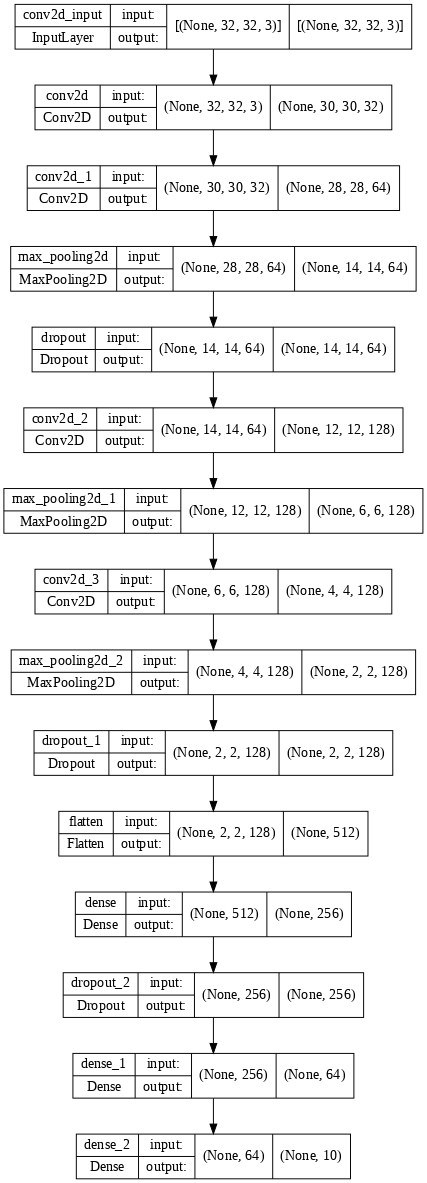

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, dpi = 70)

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
history= model.fit(train_images,
         train_labels,
         batch_size=16,
         epochs=30,
         validation_split = 0.3)

Epoch 1/30
2188/2188 [==============================] - 13s 6ms/step - loss: 2.3442 - accuracy: 0.1998 - val_loss: 1.8532 - val_accuracy: 0.3099
Epoch 2/30
2188/2188 [==============================] - 12s 5ms/step - loss: 1.8425 - accuracy: 0.3052 - val_loss: 1.8062 - val_accuracy: 0.3237
Epoch 3/30
2188/2188 [==============================] - 12s 5ms/step - loss: 1.7479 - accuracy: 0.3446 - val_loss: 1.6506 - val_accuracy: 0.4009
Epoch 4/30
2188/2188 [==============================] - 12s 6ms/step - loss: 1.6684 - accuracy: 0.3817 - val_loss: 1.6137 - val_accuracy: 0.4070
Epoch 5/30
2188/2188 [==============================] - 12s 6ms/step - loss: 1.6138 - accuracy: 0.4076 - val_loss: 1.5512 - val_accuracy: 0.4534
Epoch 6/30
2188/2188 [==============================] - 12s 5ms/step - loss: 1.5636 - accuracy: 0.4322 - val_loss: 1.5786 - val_accuracy: 0.4335
Epoch 7/30
2188/2188 [==============================] - 12s 5ms/step - loss: 1.5185 - accuracy: 0.4475 - val_loss: 1.4397 - val_ac

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 1.2208 - accuracy: 0.5694 - 903ms/epoch - 3ms/step

Test accuracy: 0.5694000124931335


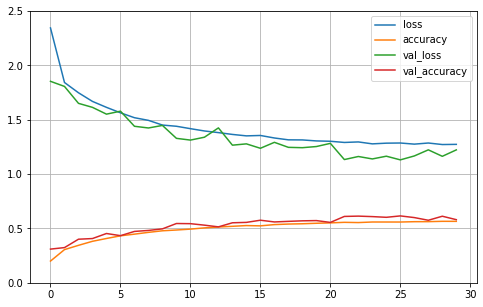

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,2.5)
plt.show()

In [ ]:
# 출력노드값
predictions = model.predict(test_images)

In [ ]:
predictions[0]

array([0.03057001, 0.02152126, 0.11204235, 0.16467248, 0.2483477 ,
       0.11932628, 0.1983256 , 0.05003011, 0.02257602, 0.03258819],
      dtype=float32)

In [ ]:
# 예측 된 클래스 추출
predictions.argmax(axis=-1)

4

In [ ]:
test_labels[0]

3

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

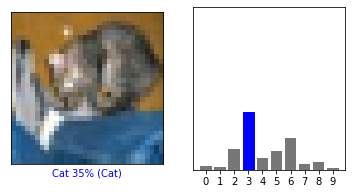

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

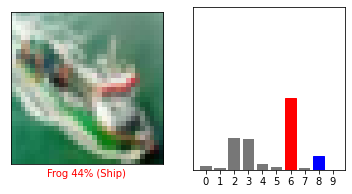

In [ ]:
# 예측 실패한 경우
i = 15
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

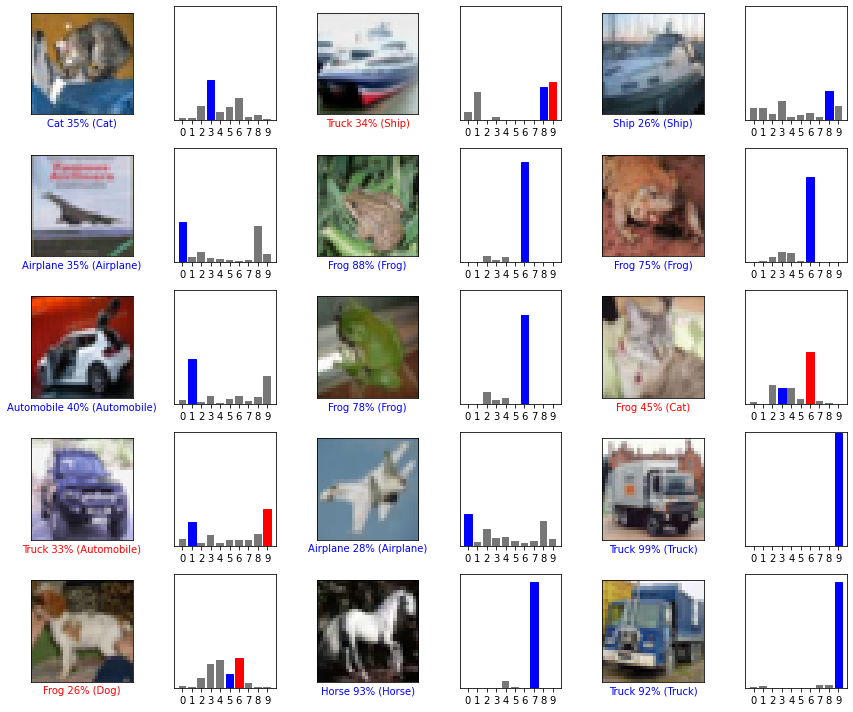

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [ ]:
predictions

array([[2.44756211e-02, 1.82064809e-02, 1.28739700e-01, ...,
        3.25031951e-02, 4.68467884e-02, 1.38474153e-02],
       [7.19670802e-02, 2.47638956e-01, 5.12227276e-03, ...,
        6.50972454e-03, 2.88938642e-01, 3.36378902e-01],
       [1.06646433e-01, 1.04901016e-01, 5.85763119e-02, ...,
        2.97459029e-02, 2.58691490e-01, 1.22737840e-01],
       ...,
       [6.60871901e-03, 2.10409751e-04, 6.82472810e-02, ...,
        1.62540063e-01, 1.04968820e-03, 1.56678457e-03],
       [7.16400221e-02, 2.06893831e-02, 1.40172467e-01, ...,
        6.15109466e-02, 3.52208465e-02, 2.47681178e-02],
       [2.53724237e-03, 3.37943748e-05, 8.32725875e-03, ...,
        8.34518611e-01, 4.52849235e-05, 1.08071126e-03]], dtype=float32)

In [ ]:
predictions.argmax(axis=-1)

array([3, 9, 8, ..., 5, 4, 7])

https://stackoverflow.com/questions/38971293/get-class-labels-from-keras-functional-model

Get class labels from Keras functional model

In [ ]:
test_labels

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [ ]:
# confusion matrix 구축
confusion_matrix_ = confusion_matrix(y_pred = predictions.argmax(axis=-1), y_true = test_labels)


In [ ]:
def plot_confusion_matrix(cm, classes, title, cmap=plt.cm.Blues):
    plt.figure(figsize=(15,15))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, font)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() /2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment='center', color='red' if cm[i,j] > thresh else "black", fontsize = 30)

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()



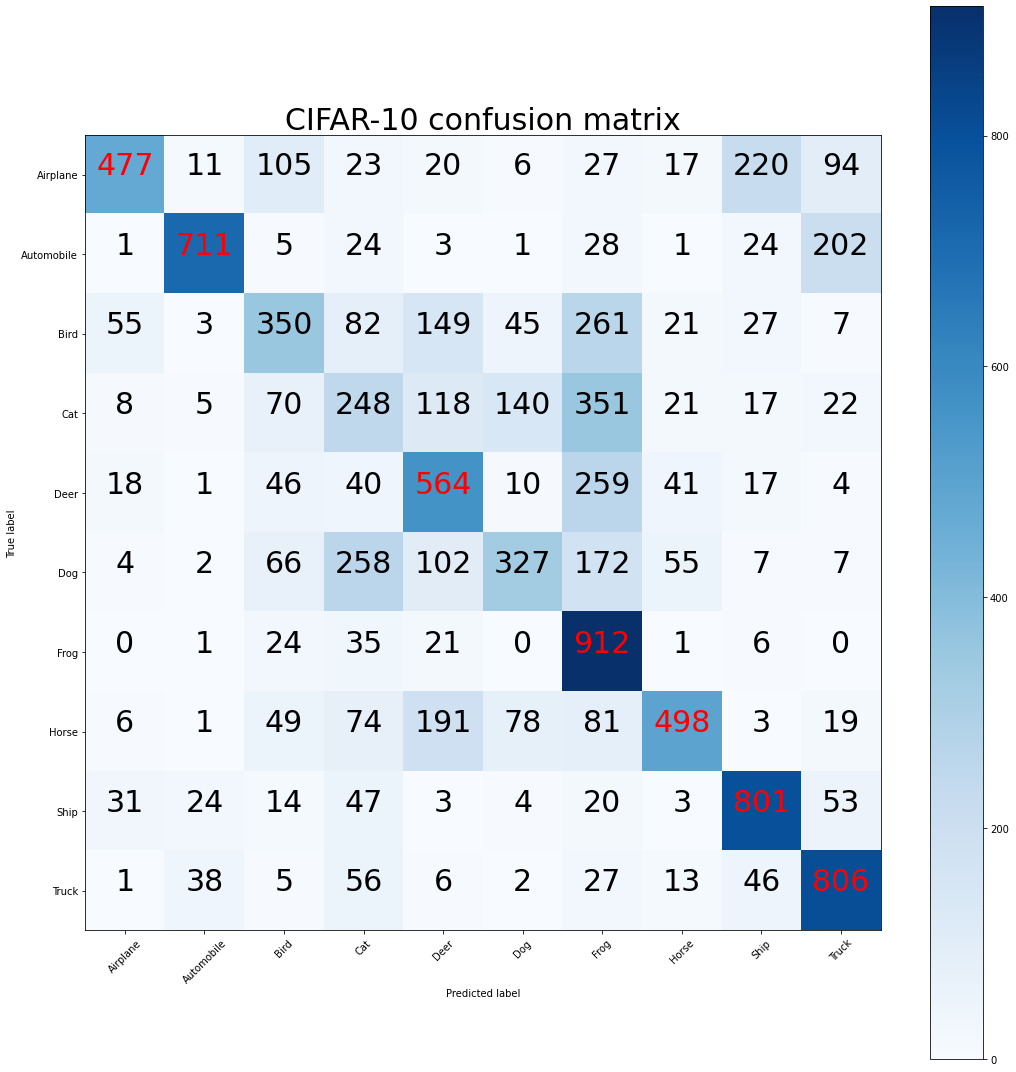

In [ ]:
plot_confusion_matrix(cm=confusion_matrix_, classes=class_names, title="CIFAR-10 confusion matrix")
